# Quality of Life 

## This code is dedicated to finding the lowest quality of life utilizing fatal overdose data 

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install seaborn

In [4]:
import pandas as pd

data = pd.read_csv('data.csv')

# Display the first few rows to verify the data was loaded correctly
print(data.head())


       _id  death_date_and_time manner_of_death  age sex race case_dispo  \
0  9368074  2007-02-08T14:55:00        Accident   29   M    W         MO   
1  9368075  2007-02-07T15:07:00        Accident   45   M    W         MO   
2  9368076  2007-02-28T12:15:00        Accident   60   F    W         MO   
3  9368077  2007-03-28T13:40:00        Accident   53   M    B         MO   
4  9368078  2007-04-23T23:59:00        Accident   36   M    W         MO   

  combined_od1 combined_od2 combined_od3 combined_od4 combined_od5  \
0      Cocaine     Fentanyl     Morphine    Oxycodone          NaN   
1     Diazepam  Hydrocodone  Mirtazapine    Oxycodone    Trazodone   
2      Cocaine       Heroin          NaN          NaN          NaN   
3      Cocaine          NaN          NaN          NaN          NaN   
4      Alcohol   Alprazolam       Heroin          NaN          NaN   

  combined_od6 combined_od7 combined_od8 combined_od9 combined_od10  \
0          NaN          NaN          NaN          N

In [5]:
# Group by the 'incident_zip' column and count occurrences
zip_counts = data['incident_zip'].value_counts().reset_index()
zip_counts.columns = ['incident_zip', 'incident_count']

# Merge the counts back with the original data on 'incident_zip'
data_with_counts = data.merge(zip_counts, on='incident_zip', how='left')

# Display the first few rows of the updated data
print(data_with_counts.head())


       _id  death_date_and_time manner_of_death  age sex race case_dispo  \
0  9368074  2007-02-08T14:55:00        Accident   29   M    W         MO   
1  9368075  2007-02-07T15:07:00        Accident   45   M    W         MO   
2  9368076  2007-02-28T12:15:00        Accident   60   F    W         MO   
3  9368077  2007-03-28T13:40:00        Accident   53   M    B         MO   
4  9368078  2007-04-23T23:59:00        Accident   36   M    W         MO   

  combined_od1 combined_od2 combined_od3  ... combined_od5 combined_od6  \
0      Cocaine     Fentanyl     Morphine  ...          NaN          NaN   
1     Diazepam  Hydrocodone  Mirtazapine  ...    Trazodone          NaN   
2      Cocaine       Heroin          NaN  ...          NaN          NaN   
3      Cocaine          NaN          NaN  ...          NaN          NaN   
4      Alcohol   Alprazolam       Heroin  ...          NaN          NaN   

  combined_od7 combined_od8 combined_od9 combined_od10 incident_zip  \
0          NaN       

In [6]:
# Find the largest incident count
max_incidents = data_with_counts['incident_count'].max()
max_zip = data_with_counts[data_with_counts['incident_count'] == max_incidents]['incident_zip'].unique()

# Find the smallest incident count
min_incidents = data_with_counts['incident_count'].min()
min_zip = data_with_counts[data_with_counts['incident_count'] == min_incidents]['incident_zip'].unique()

print(f"Largest incident count: {max_incidents} in zip code(s): {max_zip}")
print(f"Smallest incident count: {min_incidents} in zip code(s): {min_zip}")


Largest incident count: 373.0 in zip code(s): ['15210']
Smallest incident count: 1.0 in zip code(s): ['16023' '20707' '1531' '20640' '44510' '01220' '28428' '16255' '15607'
 '33467' '45429' '44444' '33914' '16160' '30733' '15083' '17569' '33406'
 '22003' '19380' '15767' '16239' '85024' '43920' '15554' '17701' '16230'
 '15081' '21045' '56345' '15342' '16403' '15639' '87124' '61539' '48221'
 '26302' '15330' '16229' '17070' '15124' '16407' '16341' '17011' '15162'
 '39532' '15336' '15627' '29577' '03253' '16362' '16335' '15611' '15458'
 '15107' '15-71' '43953' '85379' '34222' '02601' '15670' '18901' '80246'
 '19111' '28345' '15697' '15636' '22204' '57108' '15315' '15052' '55347'
 '16254' '16350' '16242' '15924' '06883' '44870' '44705' '18902' '15340'
 '40504' '15058' '15612' '15436' '27106' '15365' '15413' '26034' '28307'
 '34690' '16501' '16228' '13219' '17202' '25404' '16061' '16316' '34972'
 '15431' '17260' '15275' '15027' '16648' '21222' '30046' '48328' '15009'
 '16627' '15041' '33704'

In [7]:
# Get the top 10 neighborhoods with the largest incident counts
top_10_neighborhoods = data_with_counts[['incident_zip', 'incident_count']].drop_duplicates()
top_10_neighborhoods = top_10_neighborhoods.nlargest(10, 'incident_count')

print(top_10_neighborhoods.to_string(index=False))


incident_zip  incident_count
       15210           373.0
       15212           295.0
       15132           220.0
       15136           218.0
       15235           193.0
       15216           189.0
       15221           180.0
       15227           171.0
       15219           163.0
       15206           162.0


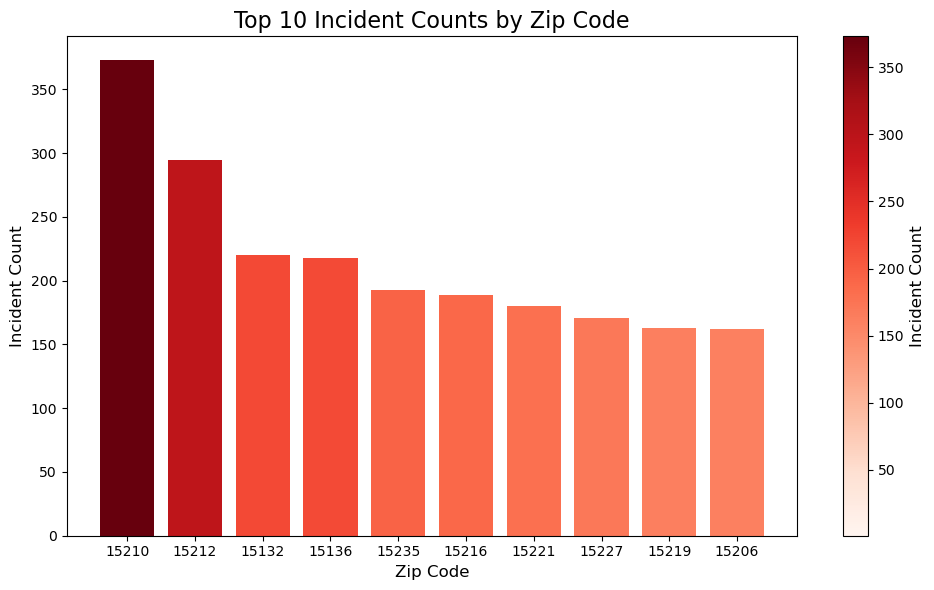

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the CSV data into a pandas DataFrame
data = pd.read_csv('data.csv')

# Group by the 'incident_zip' column and count occurrences
zip_counts = data['incident_zip'].value_counts().reset_index()
zip_counts.columns = ['incident_zip', 'incident_count']

# Merge the counts back with the original data on 'incident_zip'
data_with_counts = data.merge(zip_counts, on='incident_zip', how='left')

# Group by 'incident_zip' and get the maximum 'incident_count' for each zip code
zip_counts_sorted = data_with_counts.groupby('incident_zip')['incident_count'].max().sort_values(ascending=False)

# Select only the top 10 zip codes
top_10_zip_counts = zip_counts_sorted.head(10)

# Normalize the incident counts for color mapping (using linear normalization)
norm = mcolors.Normalize(vmin=zip_counts_sorted.min(), vmax=zip_counts_sorted.max())
cmap = plt.cm.Reds  # Red colormap (deep red for more incidents)

# Create a new column for color based on the incident count
colors = [cmap(norm(count)) for count in top_10_zip_counts]

# Plot the bar chart for top 10 zip codes
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(top_10_zip_counts.index, top_10_zip_counts.values, color=colors)

# Add title and labels
ax.set_title('Top 10 Incident Counts by Zip Code', fontsize=16)
ax.set_xlabel('Zip Code', fontsize=12)
ax.set_ylabel('Incident Count', fontsize=12)

# Set fixed ticks and labels
ax.set_xticks(range(len(top_10_zip_counts)))  # Set tick positions
ax.set_xticklabels(top_10_zip_counts.index, rotation=0)  # Set labels horizontal (rotation=0)

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array because color bar needs scalar data
cbar = fig.colorbar(sm, ax=ax)  # Link the color bar to the axis
cbar.set_label('Incident Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


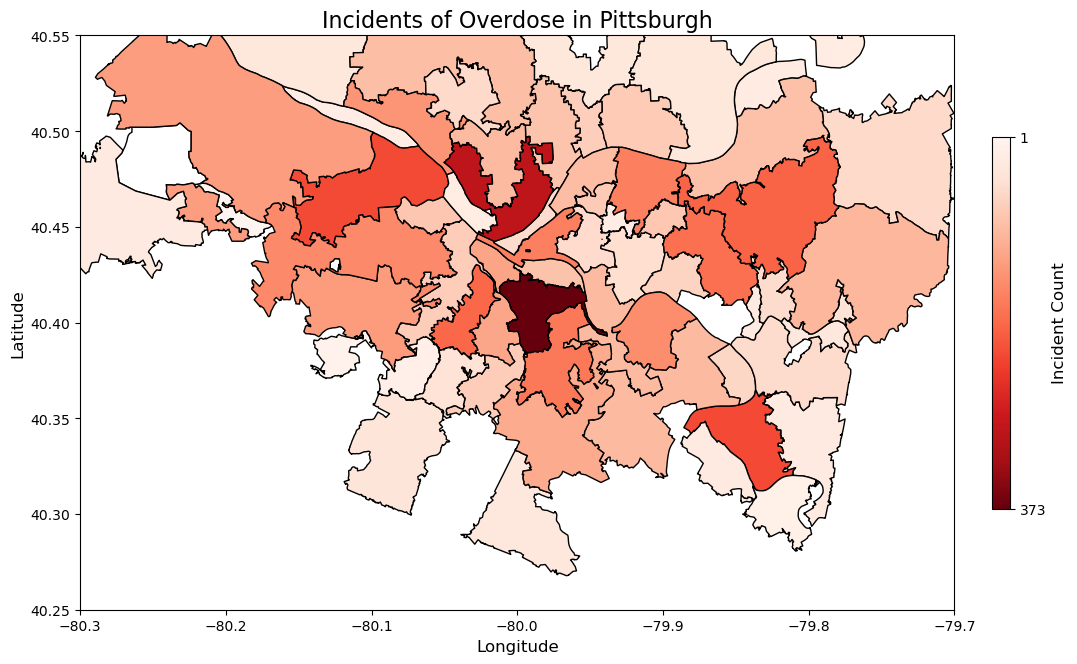

In [35]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
from io import StringIO
import matplotlib.colors as mcolors

data = pd.read_csv('data.csv')

zip_counts = data['incident_zip'].value_counts().reset_index()
zip_counts.columns = ['incident_zip', 'incident_count']

data_with_counts = data.merge(zip_counts, on='incident_zip', how='left')

zip_counts_sorted = data_with_counts.groupby('incident_zip')['incident_count'].max().sort_values(ascending=False)

# Load the GeoJSON data from the URL
geojson_url = "https://data.wprdc.org/dataset/1a5135de-cabe-4e23-b5e4-b2b8dd733817/resource/14e5de97-0a5f-4521-84f6-ba74413db598/download/alcogisallegheny-county-zip-code-boundaries.geojson"
response = requests.get(geojson_url)

# Load the GeoJSON data into a GeoDataFrame
gdf = gpd.read_file(StringIO(response.text))

# Filter the GeoDataFrame to include only zip codes between 15106 and 15295
gdf_filtered = gdf[gdf['ZIP'].astype(str).between('15106', '15295')].copy()  # Make a copy to avoid the warning

# Merge the filtered GeoDataFrame with the incident counts for all zip codes in the range
gdf_filtered['incident_count'] = gdf_filtered['ZIP'].map(zip_counts_sorted)

# Normalize the incident counts for color mapping (using linear normalization)
norm = mcolors.Normalize(vmin=zip_counts_sorted.min(), vmax=zip_counts_sorted.max())
cmap = plt.cm.Reds  # Red colormap (deep red for more incidents)

# Create a new column for color based on the incident count
gdf_filtered['color'] = gdf_filtered['incident_count'].apply(
    lambda x: cmap(norm(x)) if pd.notna(x) else 'white'  # Set 'white' for NaN values (no incidents)
)

# Plot the data
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the zip codes with the color mapped by incident counts
gdf_filtered.plot(ax=ax, edgecolor='black', color=gdf_filtered['color'])

# Set plot title and labels
ax.set_title("Incidents of Overdose in Pittsburgh", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Zoom out to show the specified range of zip codes
ax.set_xlim([-80.3, -79.7])  # Adjusted to zoom out slightly
ax.set_ylim([40.25, 40.55])  # Adjusted to zoom out slightly

# Add the color bar to the side, adjusting height to match the map
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array because color bar needs scalar data
cbar = fig.colorbar(sm, ax=ax, fraction=0.02, pad=0.04)  # Adjusted fraction and padding for size
cbar.set_label('Incident Count', fontsize=12)  # Label for the color bar
cbar.set_ticks([zip_counts_sorted.min(), zip_counts_sorted.max()])
cbar.ax.invert_yaxis()  # Color bar will now have high counts at the top

# Show the map with color bar
plt.show()
